Load the Libraries

In [5]:
import torch
import numpy as np
import matplotlib.pyplot as plt




Create auto generated data

In [6]:
X = torch.arange(-5, 5, 0.1).view(-1, 1)
func = -5 * X
Y = func + 0.4 * torch.randn(X.size())
 


Look at the shape of the data

In [7]:
print("X.shape: ", X.shape)
print("Y.shaoe: ", Y.shape)

X.shape:  torch.Size([100, 1])
Y.shaoe:  torch.Size([100, 1])


These are tensors with 100 rows and 1 column each. 

In [ ]:
Usual first step is to try to visualize the data

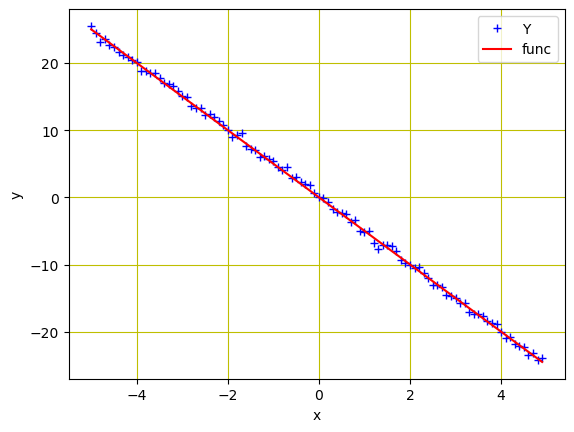

In [8]:
plt.plot(X.numpy(), Y.numpy(), 'b+', label='Y')
plt.plot(X.numpy(), func.numpy(), 'r', label='func')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid('True', color='y')
plt.show()


Create the model and cost function

In [9]:
w = torch.tensor(-10.0, requires_grad=True)

#Model
def forward(x):
    return w * x

def cost(y_pred, y):
    return torch.mean((y_pred - y) ** 2)



Now Set up the learning rate and the number of epochs

In [13]:
#learning rate
lr  = 0.1
#arrat to keep loss after each iteration
loss_list = []
# number of iterations
epochs = 20

Now we do a standar PyTorch training loop

In [15]:
for i  in range(epochs):
    # Make predictions for the all the examples in X (vectorization)
    Y_pred = forward(X)
    # now calculate the loss 
    loss = cost(Y_pred, Y)
    #append the lost to the list
    loss_list.append(loss.item())
    #back propagation step
    loss.backward()
    #parameter update
    w.data = w.data - lr * w.grad.data
    w.grad.data.zero_()
    # print diagnostic data
    print('{},\t{},\t{}'.format(i, loss.item(), w.item()))



0,	92.86231231689453,	1.1099517345428467
1,	311.3543701171875,	-9.075789451599121
2,	138.61170959472656,	-2.281900405883789
3,	61.760440826416016,	-6.813424587249756
4,	27.570146560668945,	-3.790897846221924
5,	12.359260559082031,	-5.806922912597656
6,	5.592099666595459,	-4.4622344970703125
7,	2.5814690589904785,	-5.359141826629639
8,	1.2420731782913208,	-4.760904312133789
9,	0.6461904644966125,	-5.159928798675537
10,	0.38108789920806885,	-4.893779754638672
11,	0.2631465792655945,	-5.071300983428955
12,	0.21067601442337036,	-4.95289421081543
13,	0.1873326301574707,	-5.031871795654297
14,	0.17694738507270813,	-4.979193687438965
15,	0.17232699692249298,	-5.01432991027832
16,	0.17027147114276886,	-4.990893840789795
17,	0.1693570464849472,	-5.006525993347168
18,	0.16895020008087158,	-4.99609899520874
19,	0.16876918077468872,	-5.003054141998291


Finally Plot the loss after each iteration

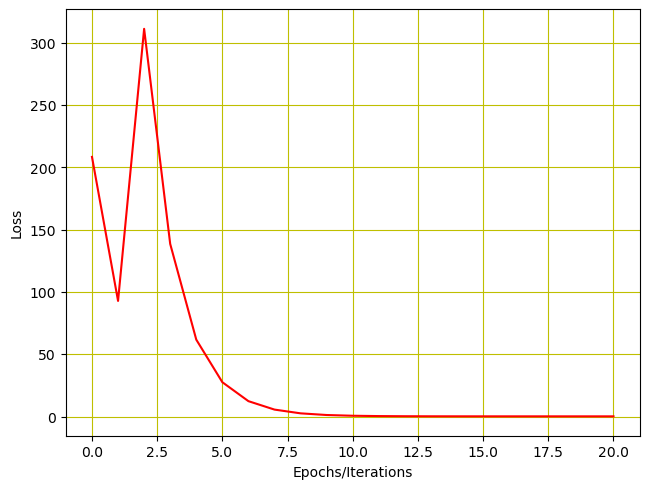

In [16]:
plt.plot(loss_list, 'r')
plt.tight_layout()
plt.grid('True', color='y')
plt.xlabel("Epochs/Iterations")
plt.ylabel("Loss")
plt.show()